In [19]:
%load_ext autoreload
%autoreload 2
from modelling import *
from models import * 
from params import * 
from utils import *
import matplotlib.pyplot as plt 
import missingno as msno
from data_pipeline import * 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## creating output dir for Plots

In [21]:
output_dir = 'plots'
check_or_create_directory(output_dir)

Directory already exists: plots


In [12]:
data_class  = DataClass(use_prediction= True,use_enhanced="lstm",custom=False,augmented_data=False)
data_class.create_dataset()
modelling_data = DataModel(data = data_class,
                           use_enhanced= data_class.use_enhanced,
                           custom_test_index=data_class.enhanced_index,
                           max_len=100,
                           custom=False)
modelling_data.create_padding()


modifying features
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower']
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower_lstm']
**************augmenting data set disabled ***********
modifying features
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower']
['link', 'lob', 'employer', 'occupation', 'name_sex', 'firstname_lower_lstm']
Shape of training tensor:  (155, 100)
Shape of testing tensor:  (77, 100)


In [27]:
df = explode_column(data_class.data,'prediction',tags_prediction)
df = df[['age',
 'firstname',
 'surname',
 'lob',
 'link',
 'occupation',
 'id',
 'état_civil',
 'employer',
 'target']]

C:\Users\marti\AppData\Local\Temp\ipykernel_17184\3114801000.py:3: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


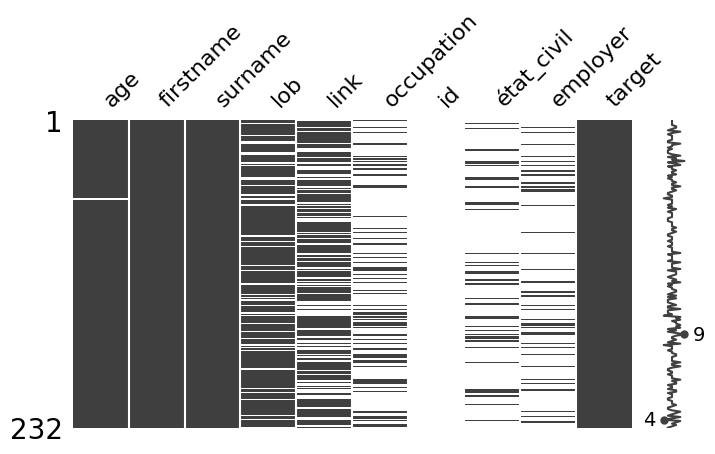

In [29]:
name = 'nan_matrix.png'
msno.matrix(df,figsize = (8,4),fontsize = 16)
plt.tight_layout()
plt.savefig(os.path.join(os.path.join(output_dir), name))

In [49]:
results

,accuracy_train,accuracy_test,model,custom,missing_names,acc_man,acc_women
0,99.995053,81.481481,mlp,1,enhanced,80.000000,82.352941
0,1.000000,77.777778,knn,1,enhanced,90.000000,70.588235
0,0.837200,74.074074,xgb,1,enhanced,80.000000,70.588235
0,0.999650,77.777778,logreg,1,enhanced,80.000000,76.470588
0,1.000000,77.777778,nb,1,enhanced,80.000000,76.470588
0,99.985164,77.777779,mlp,1,lstm,80.000000,76.470588
0,1.000000,85.185185,knn,1,lstm,90.000000,82.352941
0,0.833150,77.777778,xgb,1,lstm,80.000000,76.470588
0,0.999550,77.777778,logreg,1,lstm,80.000000,76.470588
0,0.999950,77.777778,nb,1,lstm,80.000000,76.470588


<Axes: xlabel='model', ylabel='accuracy_test'>

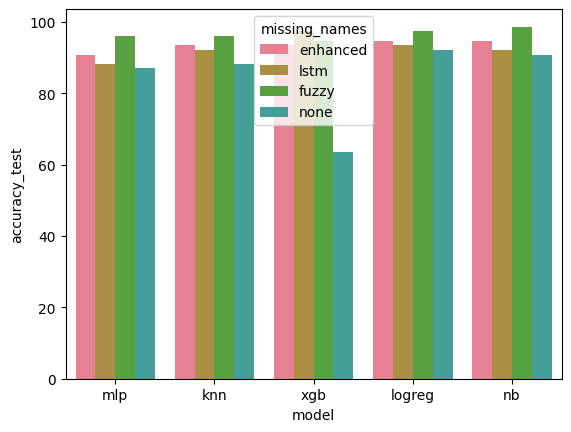

In [65]:
results = pd.read_excel('results/results.xlsx',index_col = 0)
custom = results[results['custom']==0]
not_custom = results[results['custom']==0]
sns.barplot(custom,x = 'model',y = 'accuracy_test',hue = 'missing_names')

C:\Users\marti\AppData\Local\Temp\ipykernel_17184\1027344575.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels([f'{tick:.2f}' for tick in y_ticks])
C:\Users\marti\AppData\Local\Temp\ipykernel_17184\1027344575.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels([f'{tick:.2f}' for tick in y_ticks])


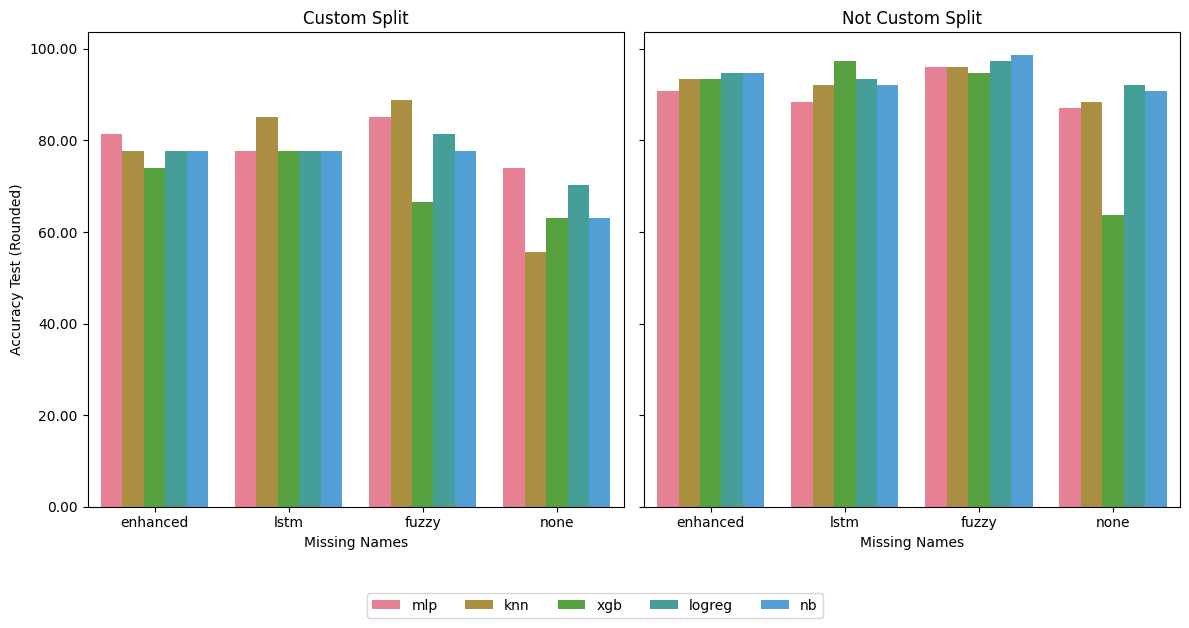

In [63]:
custom = results[results['custom'] == 1]
not_custom = results[results['custom'] == 0]

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Using a nice color palette
sns.set_palette("husl")

# Plotting the custom case
sns.barplot(ax=axes[0], data=custom, x='missing_names', y='accuracy_test', hue='model')
axes[0].set_title('Custom Split')
axes[0].set_ylabel('Accuracy Test (Rounded)')
axes[0].set_xlabel('Missing Names')

# Plotting the not_custom case
sns.barplot(ax=axes[1], data=not_custom, x='missing_names', y='accuracy_test', hue='model')
axes[1].set_title('Not Custom Split')
axes[1].set_ylabel('')
axes[1].set_xlabel('Missing Names')

# Round y-ticks to second digit
y_ticks = axes[0].get_yticks()
axes[0].set_yticklabels([f'{tick:.2f}' for tick in y_ticks])
axes[1].set_yticklabels([f'{tick:.2f}' for tick in y_ticks])

# Shared legend on one line at the bottom
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5, -0.05))

# Hide legends on subplots to only show the shared legend
axes[0].get_legend().remove()
axes[1].get_legend().remove()

plt.tight_layout(rect=[0, 0.05, 1, 1]) # Adjust the rect to make space for the bottom legend
plt.show()